## Follow the chapter 2 of the textbook and finish the code as an end-to-end machine learning project

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.data.ndim

2

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.target.ndim

1

In [9]:
boston.target.shape

(506,)

In [10]:
housing = np.c_[boston.data, boston.target]

In [11]:
housing = pd.DataFrame(housing)

In [12]:
housing.columns = list(boston.feature_names) + ['MEDV']

In [13]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
print("Hello World")

Hello World


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


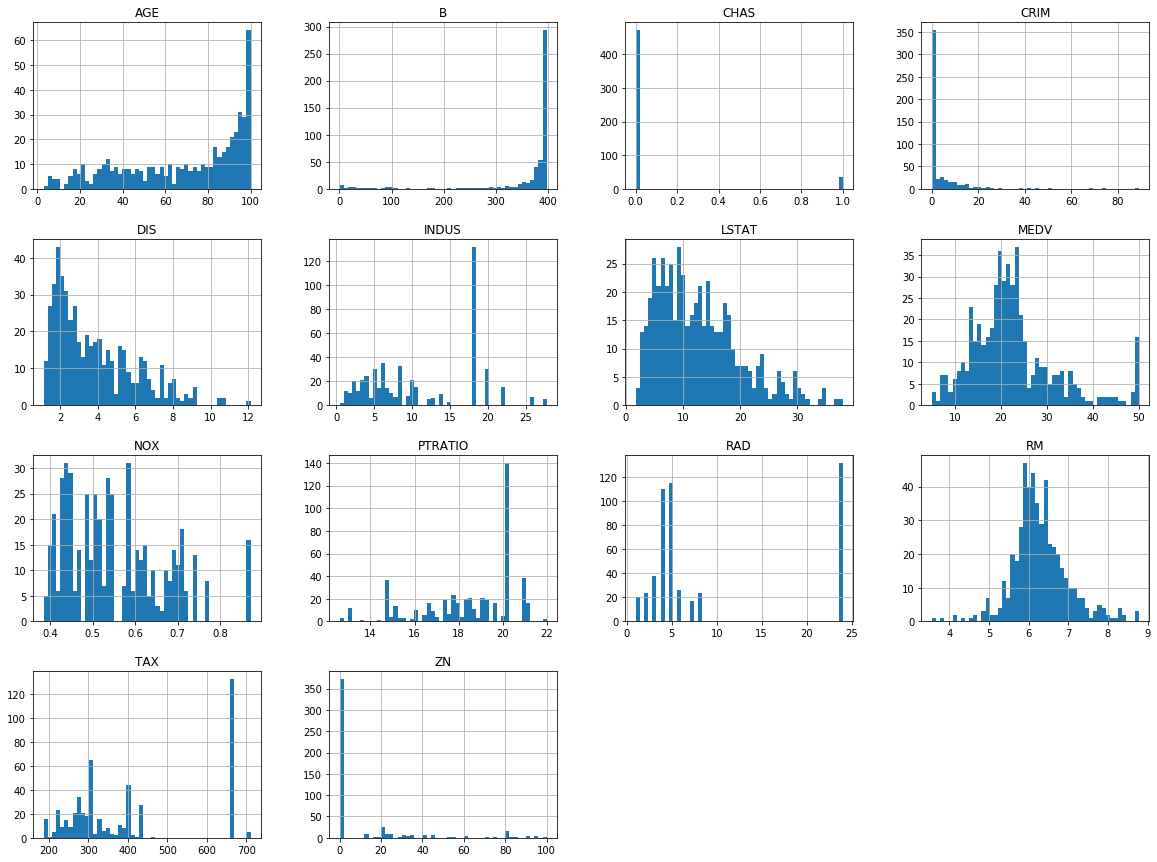

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

405

In [19]:
len(test_set)

101

In [20]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
housing["income_cat"] = pd.cut(housing["MEDV"],
                               bins=[0, 10, 20, 30, 40, 50, np.inf],
                               labels=[0, 1, 2, 3, 4, 5])

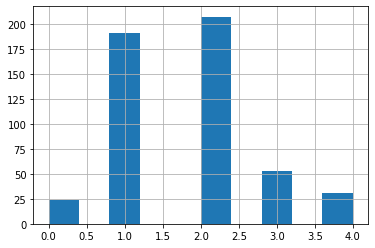

In [23]:
housing["income_cat"].hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

2    0.411765
1    0.372549
3    0.107843
4    0.058824
0    0.049020
5    0.000000
Name: income_cat, dtype: float64

In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [27]:
housing = strat_train_set.copy()

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679439
ZN         0.375967
B          0.324998
DIS        0.266088
CHAS       0.183854
RAD       -0.381903
AGE       -0.390075
CRIM      -0.391283
NOX       -0.438384
TAX       -0.477005
PTRATIO   -0.483569
INDUS     -0.499120
LSTAT     -0.734822
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF60F4BC88>,
      dtype=object)

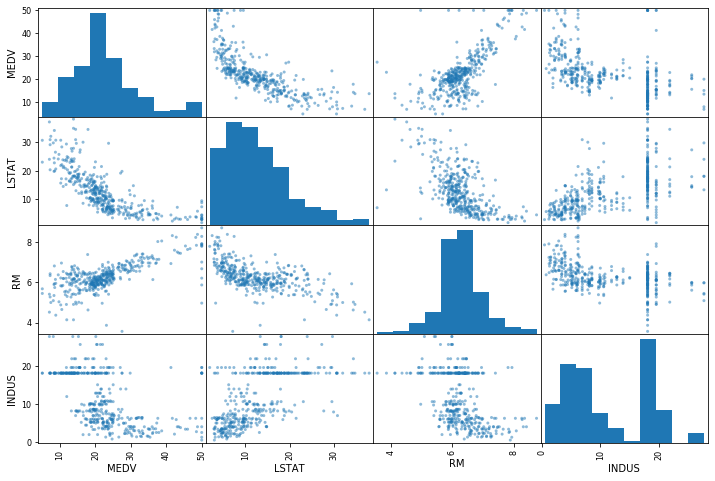

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "LSTAT", "RM", "INDUS"]

scatter_matrix(housing[attributes], figsize=(12,8))

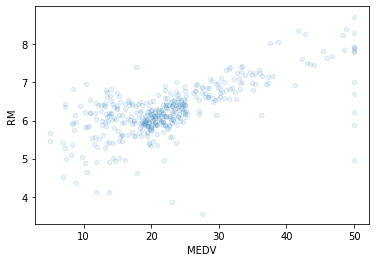

In [31]:
housing.plot(kind="scatter", x="MEDV", y="RM", alpha=0.1)

In [32]:
housing["rooms_to_tax"] = housing["RM"]/housing["TAX"]
housing["tax_per_rm"] = housing["TAX"]/housing["RM"]
housing["landzoned_to_room"] = housing["ZN"]/housing["RM"]
housing["status_per_landzoned"] = housing["LSTAT"]/housing["ZN"]
housing["highways_to_industry"] = housing["RAD"]/housing["INDUS"]
housing["blacks_to_lstat"] = housing["B"]/housing["LSTAT"]

In [33]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV                    1.000000
blacks_to_lstat         0.807401
RM                      0.679439
rooms_to_tax            0.624264
ZN                      0.375967
landzoned_to_room       0.342027
B                       0.324998
DIS                     0.266088
highways_to_industry    0.198425
CHAS                    0.183854
RAD                    -0.381903
AGE                    -0.390075
CRIM                   -0.391283
status_per_landzoned   -0.405537
NOX                    -0.438384
TAX                    -0.477005
PTRATIO                -0.483569
INDUS                  -0.499120
tax_per_rm             -0.536372
LSTAT                  -0.734822
Name: MEDV, dtype: float64

## Prepare the Data for Machine Learning Algorithm

In [34]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### Data Cleaning

In [35]:
housing.dropna(subset=["RM"])    # option 1
housing.drop("RM", axis=1)       # option 2
median = housing["RM"].median()  #option 3
housing["RM"].fillna(median, inplace=True)

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

EW: No data of "object" or unusable, non-numerical datatype. No attribute needs to be dropped here (as compared to Ch.2)

### Custom Transformers

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

RM_idx, B_idx, LSTAT_idx, TAX_idx = 5, 11, 12, 9

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_rooms_per_taxrate = True): # no *args or **kargs
        self.add_rooms_per_taxrate = add_rooms_per_taxrate
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_lowerStatus = X[:, RM_idx] / X[:, LSTAT_idx]
        blacks_per_lowerStatus = X[:, B_idx] / X[:, LSTAT_idx]
        if self.add_rooms_per_taxrate:
            rooms_per_taxrate = X[:, RM_idx] / X[:, TAX_idx]
            return np.c_[X, rooms_per_lowerStatus, blacks_per_lowerStatus, rooms_per_taxrate]

        else:
            return np.c_[X, rooms_per_lowerStatus, blacks_per_lowerStatus]

attr_adder = CombinedAttributesAdder(add_rooms_per_taxrate=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_lowerStatus", "blacks_per_lowerStatus"],
    index=housing.index)
housing_extra_attribs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,rooms_per_lowerStatus,blacks_per_lowerStatus
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,0.526202,37.368989
36,0.09744,0.0,5.96,0.0,0.499,5.841,61.4,3.3779,5.0,279.0,19.2,377.56,11.41,0.511919,33.090272
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,0.475606,31.032056
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,0.902930,50.282803
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,0.397838,26.817568


### Feature Scaling

### Transformation Pipelines

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing)

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Training and Evaluating on the Training Set

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [20.0584383  21.27987018 18.31707272 27.77100735 14.7327443 ]
Labels: [20.8, 20.0, 22.2, 32.2, 18.9]


In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.095688233431635

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Fine-tune your Model (Better Evaluation Using Cross-Validation)

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [48]:
display_scores(tree_rmse_scores)

Scores: [4.92160493 4.52871597 3.42818305 3.95418889 3.4648593  3.89493261
 3.74556404 4.87521794 5.60867631 3.67828085]
Mean: 4.210022389544121
Standard deviation: 0.6954406509900067


In [49]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.4086796  4.64868715 3.67453904 3.39463535 3.8988494  3.14103003
 7.82908756 3.64675707 5.60644157 4.01098998]
Mean: 4.325969675882147
Standard deviation: 1.3526201224876666


In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.1726633370154431

In [52]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.15357435 3.75114611 2.6941514  2.85265854 2.37996811 2.96175328
 3.32661703 2.94383412 5.05378537 2.92777041]
Mean: 3.104525871533914
Standard deviation: 0.7749606603239664


In [53]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      4.325970
std       1.425787
min       3.141030
25%       3.468199
50%       3.786694
75%       4.489263
max       7.829088
dtype: float64

In [54]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

4.437032415768746

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

C:\Users\EcW78\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [56]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.657520504487873 {'max_features': 2, 'n_estimators': 3}
4.035724109364847 {'max_features': 2, 'n_estimators': 10}
3.582068948692111 {'max_features': 2, 'n_estimators': 30}
4.168018592556755 {'max_features': 4, 'n_estimators': 3}
3.370443532231388 {'max_features': 4, 'n_estimators': 10}
3.2280486779673465 {'max_features': 4, 'n_estimators': 30}
4.2876796661705 {'max_features': 6, 'n_estimators': 3}
3.513147301266492 {'max_features': 6, 'n_estimators': 10}
3.2964246099404275 {'max_features': 6, 'n_estimators': 30}
3.8093304332697344 {'max_features': 8, 'n_estimators': 3}
3.5546759053504733 {'max_features': 8, 'n_estimators': 10}
3.3302502697523977 {'max_features': 8, 'n_estimators': 30}
3.9846218416710655 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.2762816628997977 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.593023584927906 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.2389104022895423 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [59]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004388,1.016607e-03,0.000601,4.908645e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-19.544883,-12.846804,...,-21.692497,7.727233,18,-5.417884e+00,-4.852301e+00,-4.696598e+00,-6.268407e+00,-5.042397e+00,-5.255518e+00,5.608393e-01
1,0.010173,3.179328e-03,0.000997,6.304496e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-16.399074,-11.794751,...,-16.287069,3.520783,15,-3.233433e+00,-2.230350e+00,-3.001827e+00,-3.170897e+00,-3.382313e+00,-3.003764e+00,4.055007e-01
2,0.021956,1.268314e-03,0.001196,3.978297e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-11.779795,-9.347060,...,-12.831218,3.494188,10,-2.218237e+00,-2.006182e+00,-2.027849e+00,-1.895191e+00,-2.078801e+00,-2.045252e+00,1.052587e-01
3,0.002400,4.990328e-04,0.000599,4.892799e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-17.423374,-12.098505,...,-17.372379,5.535652,16,-5.216047e+00,-5.383234e+00,-5.848070e+00,-4.059997e+00,-4.623371e+00,-5.026144e+00,6.220620e-01
4,0.007980,6.313555e-04,0.000995,1.319728e-06,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-11.252083,-8.168477,...,-11.359890,2.111769,7,-2.830100e+00,-2.868273e+00,-3.057529e+00,-2.718264e+00,-2.897672e+00,-2.874368e+00,1.099602e-01
5,0.022340,4.874312e-04,0.001795,3.988996e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.387597,-7.034753,...,-10.420298,2.811046,1,-1.850406e+00,-1.842381e+00,-1.774961e+00,-1.743150e+00,-1.912202e+00,-1.824620e+00,5.958928e-02
6,0.003399,4.989732e-04,0.000598,4.885811e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-16.767503,-12.942030,...,-18.384197,5.598378,17,-4.288844e+00,-5.927114e+00,-4.816997e+00,-5.068803e+00,-4.474342e+00,-4.915220e+00,5.733908e-01
7,0.009766,1.155912e-03,0.000995,2.360686e-05,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-12.080125,-8.333293,...,-12.342204,2.714147,8,-2.202277e+00,-2.512942e+00,-2.201666e+00,-2.481599e+00,-2.375379e+00,-2.354772e+00,1.328336e-01
8,0.027726,3.995976e-04,0.001396,4.884804e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-10.326437,-7.369395,...,-10.866415,2.940419,5,-1.790831e+00,-1.681278e+00,-1.576917e+00,-1.669805e+00,-1.669797e+00,-1.677725e+00,6.796077e-02
9,0.003584,4.822740e-04,0.000797,3.986142e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-13.381399,-7.313032,...,-14.510998,5.709836,13,-3.729542e+00,-4.769205e+00,-5.476942e+00,-3.958559e+00,-4.705504e+00,-4.527950e+00,6.248162e-01


In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

C:\Users\EcW78\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [61]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.1945836659526607 {'max_features': 7, 'n_estimators': 180}
3.4413545955256066 {'max_features': 5, 'n_estimators': 15}
3.412064944408931 {'max_features': 3, 'n_estimators': 72}
3.335093493650778 {'max_features': 5, 'n_estimators': 21}
3.1906695574871486 {'max_features': 7, 'n_estimators': 122}
3.41133690906523 {'max_features': 3, 'n_estimators': 75}
3.3878831506641136 {'max_features': 3, 'n_estimators': 88}
3.229322583226187 {'max_features': 5, 'n_estimators': 100}
3.3460565013999757 {'max_features': 3, 'n_estimators': 150}
4.392161531728094 {'max_features': 5, 'n_estimators': 2}


In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03255834, 0.00561189, 0.05094867, 0.00079486, 0.02531644,
       0.16299847, 0.01750809, 0.03687915, 0.0085184 , 0.01992076,
       0.03222608, 0.01557437, 0.15016763, 0.22424609, 0.12156226,
       0.09516851])

In [71]:
extra_attribs = ["rooms_per_lowerStatus", "blacks_per_lowerStatus", "rooms_per_taxrate"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs   

# no need for Key "cat", as that deals with attribute "ocean_proximity" from textbook
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.22424609240707025, 'rooms_per_lowerStatus'),
 (0.16299846569578283, 'RM'),
 (0.1501676329197516, 'LSTAT'),
 (0.12156225690002094, 'blacks_per_lowerStatus'),
 (0.09516851041260097, 'rooms_per_taxrate'),
 (0.050948667239781996, 'INDUS'),
 (0.036879148166165575, 'DIS'),
 (0.032558342446629786, 'CRIM'),
 (0.03222608456059943, 'PTRATIO'),
 (0.025316436190419653, 'NOX'),
 (0.01992075593586144, 'TAX'),
 (0.017508087826358147, 'AGE'),
 (0.015574367735983292, 'B'),
 (0.008518404713671508, 'RAD'),
 (0.005611885246955503, 'ZN'),
 (0.0007948616023470642, 'CHAS')]

In [73]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set[""].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [81]:
final_rmse

3.3738132909223593

Computing a 95% CI for the test RMSE:

In [76]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.12355095, 4.2726764 ])

## Extra Material

## A full pipeline with both preparation and prediction

In [77]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([20.0584383 , 21.27987018, 18.31707272, 27.77100735, 14.7327443 ])

## Model persistence using joblib

In [78]:
my_model = full_pipeline_with_predictor

In [79]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

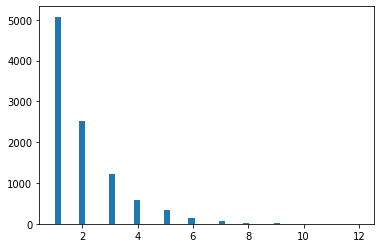

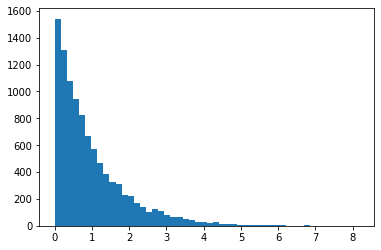

In [80]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()